# Import Required Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset

In [46]:
sales = pd.read_csv('supermarket_sales - Sheet1.csv')

In [47]:
sales.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [48]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [49]:
sales['date'] = pd.to_datetime(sales['Date'])

In [50]:
sales['date'].dtype

dtype('<M8[ns]')

In [51]:
type(sales['date'])

pandas.core.series.Series

In [52]:
sales['date'] = pd.to_datetime(sales['date'])

In [53]:
sales['day'] = (sales['date']).dt.day
sales['month'] = (sales['date']).dt.month
sales['year'] = (sales['date']).dt.year

In [54]:
sales['Time'] = pd.to_datetime(sales['Time'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_3112\721023929.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales['Time'] = pd.to_datetime(sales['Time'])


In [55]:
sales['Hour'] = (sales['Time']).dt.hour    #type(sales['Time'])

In [56]:
sales['Hour'].nunique()  #gives us the number of unique hours 

11

In [57]:
  sales['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12])

In [58]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,Time,cogs,gross margin percentage,gross income,Rating,date,day,month,year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,2025-06-20 15:24:41.880000,307.58738,4.761905e+00,15.379369,6.97270,2019-02-14 00:05:45.600000,15.256000,1.993000,2019.0,14.910000
min,10.080000,1.000000,0.508500,10.678500,2025-06-20 10:00:00,10.17000,4.761905e+00,0.508500,4.00000,2019-01-01 00:00:00,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,2025-06-20 12:43:00,118.49750,4.761905e+00,5.924875,5.50000,2019-01-24 00:00:00,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,2025-06-20 15:19:00,241.76000,4.761905e+00,12.088000,7.00000,2019-02-13 00:00:00,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,2025-06-20 18:15:00,448.90500,4.761905e+00,22.445250,8.50000,2019-03-08 00:00:00,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,2025-06-20 20:59:00,993.00000,4.761905e+00,49.650000,10.00000,2019-03-30 00:00:00,31.000000,3.000000,2019.0,20.000000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,6.131498e-14,11.708825,1.71858,NaN,8.693563,0.835254,0.0,3.186857


# find the unique values

In [59]:
categorical_columns = [cname for cname in sales.columns if sales[cname].dtype == "object"]

In [60]:
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Payment']

In [61]:
# List of columns to check unique values for
columns = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']

# Print number of unique values in each column
for col in columns:
    print(f"# unique values in {col}: {sales[col].nunique()}")


# unique values in Branch: 3
# unique values in City: 3
# unique values in Customer type: 2
# unique values in Gender: 2
# unique values in Product line: 6
# unique values in Payment: 3


Check for Missing Values and Handle Them

In [62]:
# Check for missing values in each column
print("Missing values per column:\n", sales.isnull().sum())

# Drop rows with any missing values
sales.dropna(inplace=True)

# Drop duplicate rows
sales.drop_duplicates(inplace=True)

# Confirm no missing or duplicate values remain
print("\nAfter cleaning:")
print("Missing values:\n", sales.isnull().sum())
print("Total duplicates:", sales.duplicated().sum())


Missing values per column:
 Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
date                       0
day                        0
month                      0
year                       0
Hour                       0
dtype: int64

After cleaning:
Missing values:
 Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                     

In [63]:
# Convert 'Order Date' to datetime format
sales['Date'] = pd.to_datetime(sales['Date'])

# Extract day, month, and year from 'Order Date'
sales['Order Day'] = sales['Date'].dt.day
sales['Order Month'] = sales['Date'].dt.month
sales['Order Year'] = sales['Date'].dt.year


In [64]:
print(sales[['Date', 'Order Day', 'Order Month', 'Order Year']].head())

        Date  Order Day  Order Month  Order Year
0 2019-01-05          5            1        2019
1 2019-03-08          8            3        2019
2 2019-03-03          3            3        2019
3 2019-01-27         27            1        2019
4 2019-02-08          8            2        2019


In [65]:
# Label Encode Categorical Columns in sales

from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Strip spaces from column names just in case
sales.columns = sales.columns.str.strip()

# Apply label encoding to relevant columns
categorical_cols = ['Category', 'Sub Category', 'City', 'Region', 'State', 'Month']

for col in categorical_cols:
    if col in sales.columns:
        sales[col] = le.fit_transform(sales[col])
    else:
        print(f"Column '{col}' not found in sales DataFrame.")

# Display the first few rows after encoding
print(sales.head())


Column 'Category' not found in sales DataFrame.
Column 'Sub Category' not found in sales DataFrame.
Column 'Region' not found in sales DataFrame.
Column 'State' not found in sales DataFrame.
Column 'Month' not found in sales DataFrame.
    Invoice ID Branch  City Customer type  Gender            Product line  \
0  750-67-8428      A     2        Member  Female       Health and beauty   
1  226-31-3081      C     1        Normal  Female  Electronic accessories   
2  631-41-3108      A     2        Normal    Male      Home and lifestyle   
3  123-19-1176      A     2        Member    Male       Health and beauty   
4  373-73-7910      A     2        Normal    Male       Sports and travel   

   Unit price  Quantity   Tax 5%     Total  ... gross income Rating  \
0       74.69         7  26.1415  548.9715  ...      26.1415    9.1   
1       15.28         5   3.8200   80.2200  ...       3.8200    9.6   
2       46.33         7  16.2155  340.5255  ...      16.2155    7.4   
3       58.22    

# Exploratory Data Analysis (EDA)

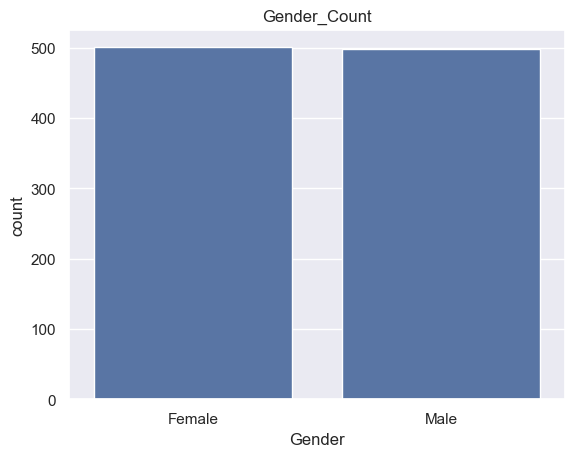

In [66]:
# Distribution of Sales by Category

sns.set(style="darkgrid")       #style the plot background to become a grid
genderCount  = sns.countplot(x="Gender", data =sales).set_title("Gender_Count")

Text(0.5, 1.0, 'Ratings by Branch')

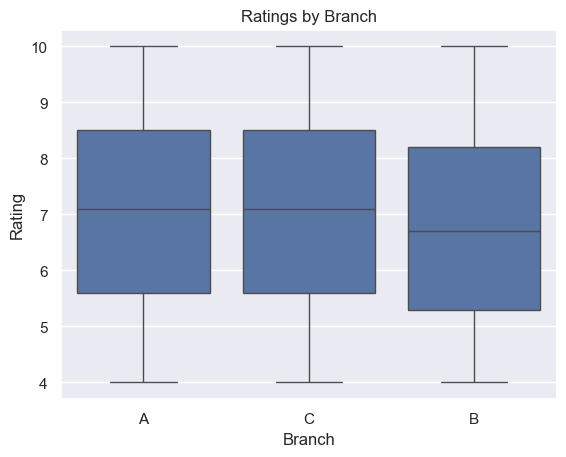

In [67]:
 sns.boxplot(x="Branch", y = "Rating" ,data =sales).set_title("Ratings by Branch") 

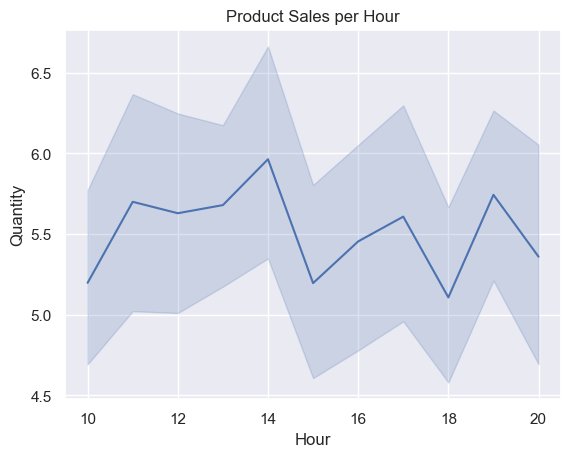

In [68]:
# Sales by the hour in the comapny 

genderCount  = sns.lineplot(x="Hour",  y = 'Quantity',data =sales).set_title("Product Sales per Hour")


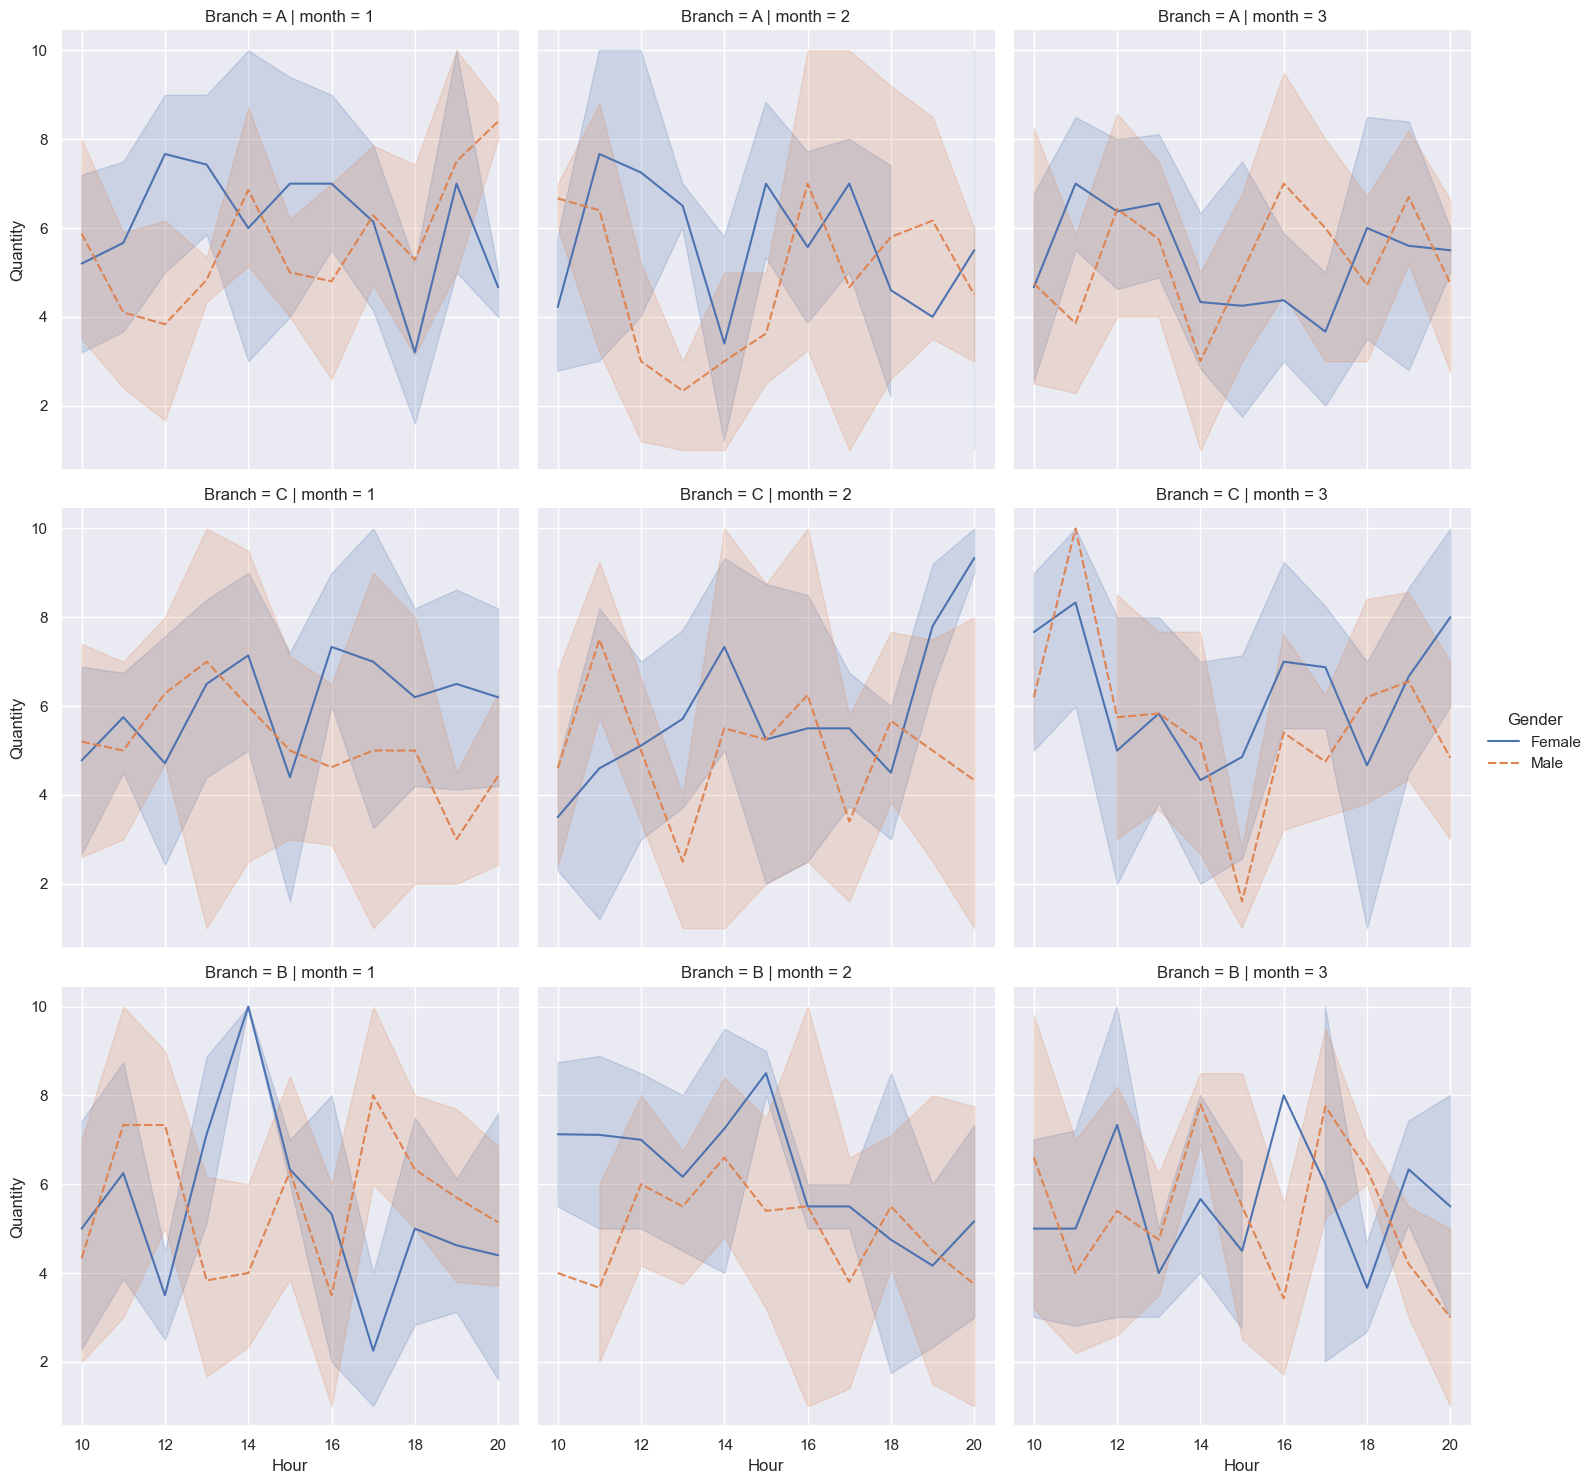

In [69]:
genderCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'month' , row= 'Branch', kind="line", hue="Gender", style="Gender", data =sales)


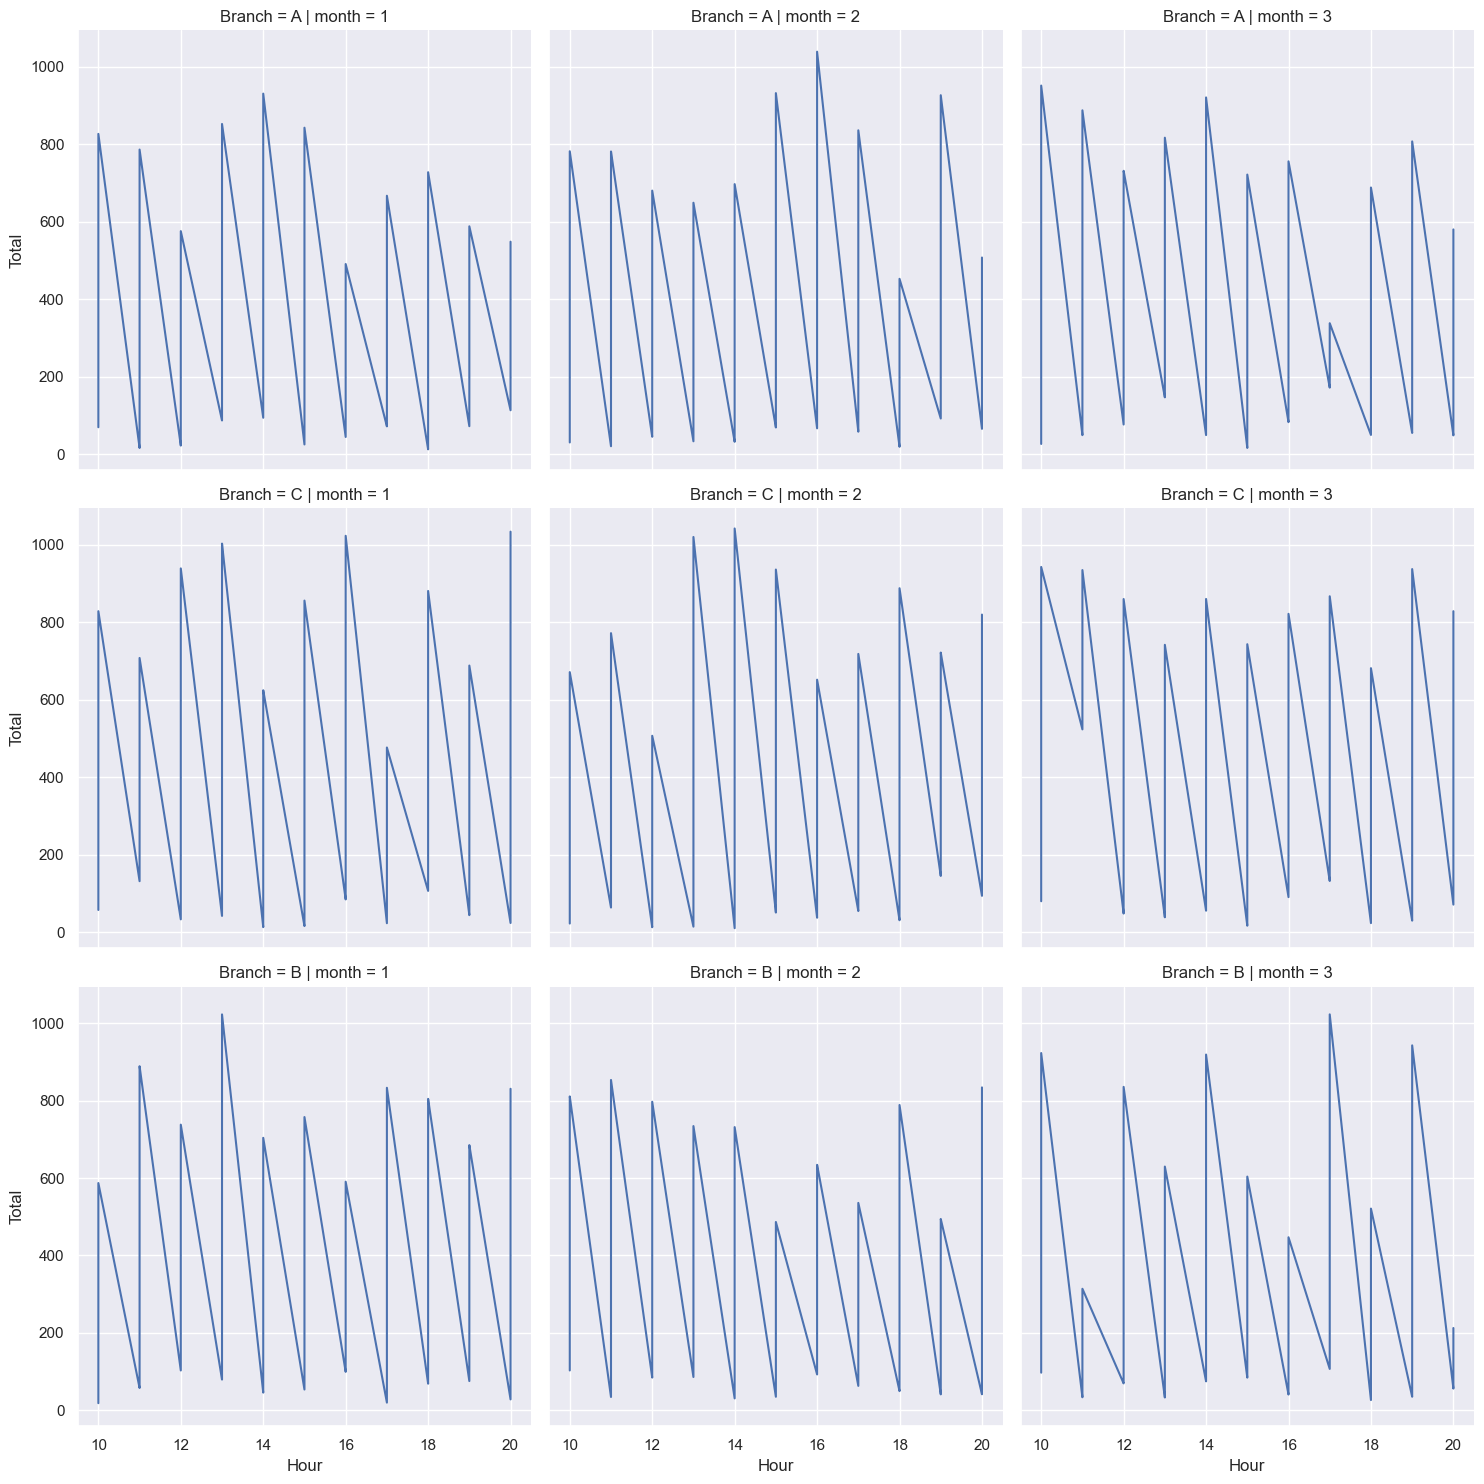

In [70]:
genderCount  = sns.relplot(x="Hour",  y = 'Total', col= 'month' , row= 'Branch', estimator = None, kind="line", data =sales)


In [71]:
sales['Rating'].unique()


array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

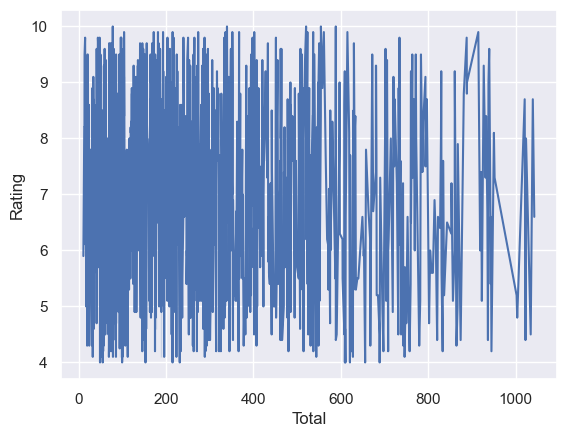

In [72]:
ageDisSpend = sns.lineplot(x="Total", y = "Rating", data =sales)


 Total sales over time 

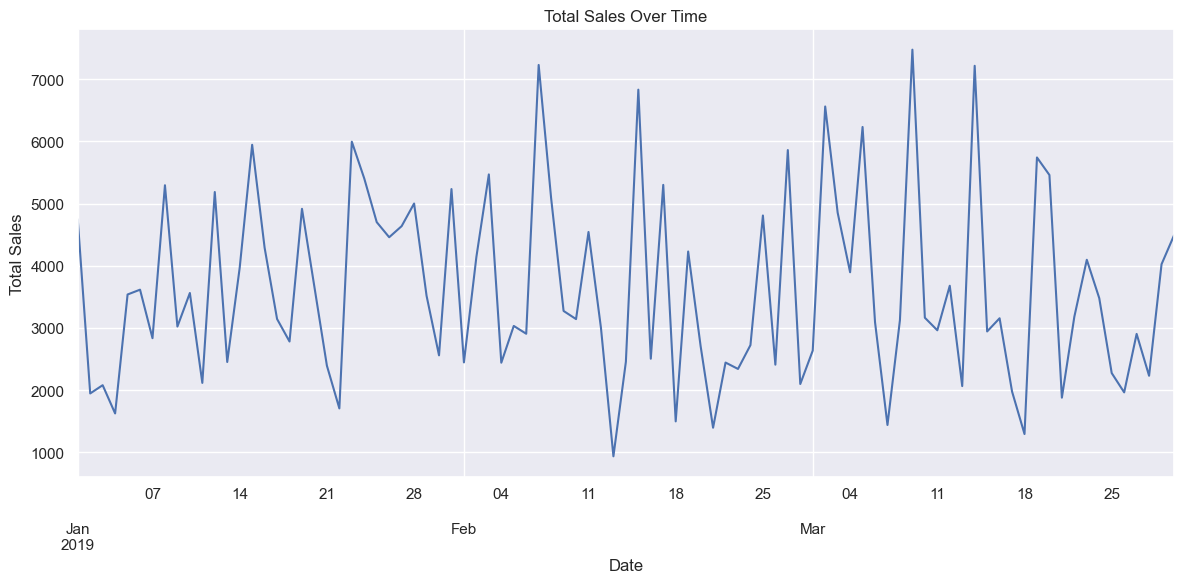

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date' is in datetime format
sales['Date'] = pd.to_datetime(sales['Date'])

# Group by date and sum 'Total' column
daily_sales = sales.groupby('Date')['Total'].sum()

# Plot the trend
plt.figure(figsize=(12, 6))
daily_sales.plot()

plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


Correlation Heatmap

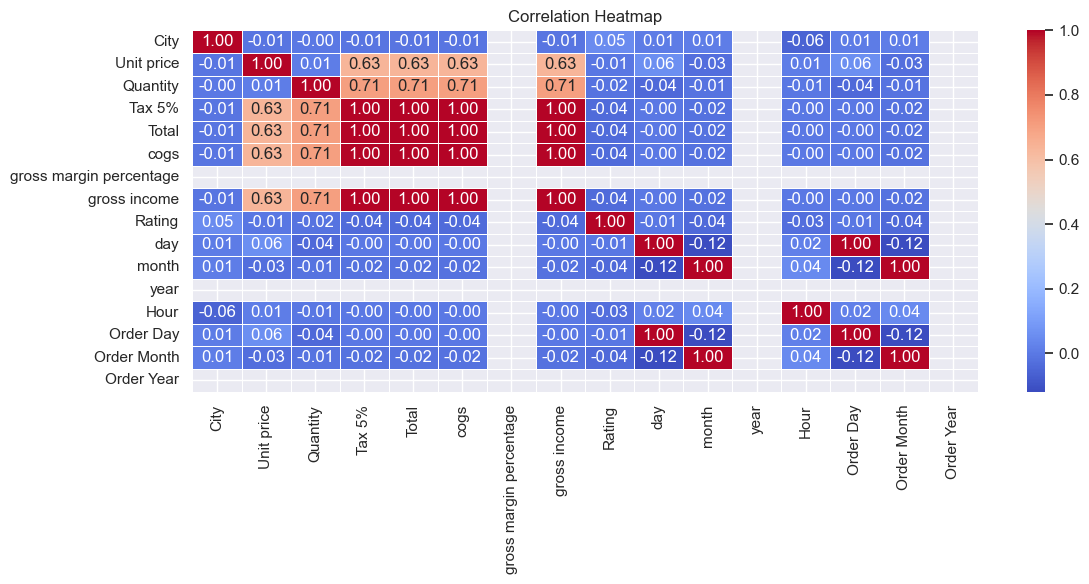

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Correlation Heatmap
plt.figure(figsize=(12, 6))

# Compute correlation matrix for numerical columns
corr_matrix = sales.corr(numeric_only=True)

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


# Feature Selection and Model Building

feature selection

In [78]:
# prepare the data
# Convert 'Date' to datetime and drop irrelevant columns
sales['Date'] = pd.to_datetime(sales['Date'])
sales.drop(columns=['Invoice ID', 'Date', 'Time'], inplace=True)

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

for col in sales.select_dtypes(include='object').columns:
    sales[col] = label_enc.fit_transform(sales[col])

# Separate features and target
X = sales.drop(columns=['Total'])
y = sales['Total']


Correlation with Total:
 Total                      1.000000
gross income               1.000000
Tax 5%                     1.000000
cogs                       1.000000
Quantity                   0.705510
Unit price                 0.633962
Branch                     0.041047
Product line               0.031621
Order Day                 -0.002515
day                       -0.002515
Hour                      -0.002770
Payment                   -0.012434
City                      -0.012812
Customer type             -0.019670
month                     -0.022301
Order Month               -0.022301
Rating                    -0.036442
Gender                    -0.049451
gross margin percentage         NaN
year                            NaN
Order Year                      NaN
Name: Total, dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_3112\3212115488.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations[1:].values, y=correlations[1:].index, palette="viridis")


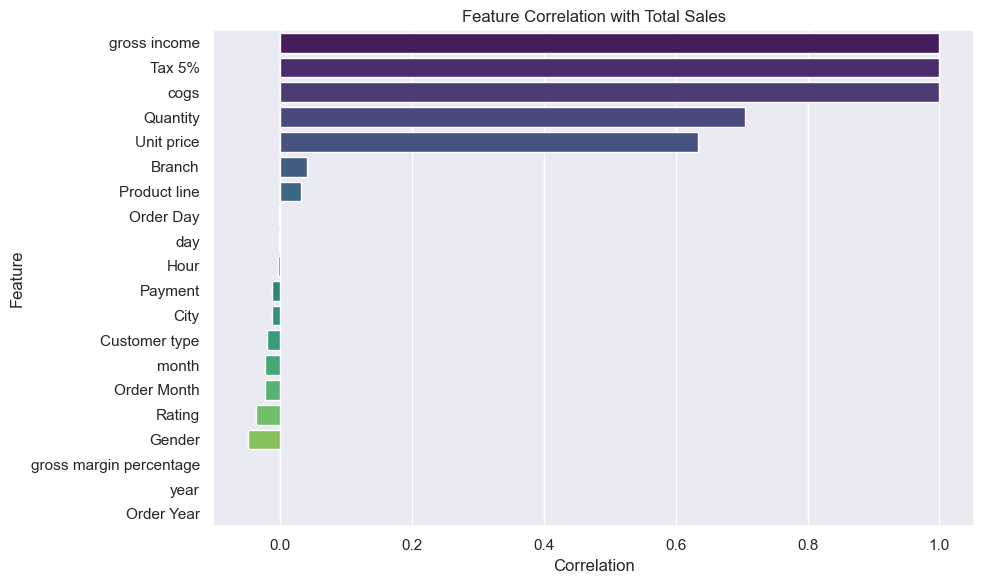

In [79]:
# Feature Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation with the target
correlations = sales.corr(numeric_only=True)['Total'].sort_values(ascending=False)
print("Correlation with Total:\n", correlations)

# Visualize top correlated features
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations[1:].values, y=correlations[1:].index, palette="viridis")
plt.title("Feature Correlation with Total Sales")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [81]:
# Drop Invoice ID, Date, Time (datetime) and the target column
sales_clean = sales.drop(columns=['Invoice ID', 'Date', 'Time', 'Total'], errors='ignore')


In [82]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
for col in sales_clean.select_dtypes(include='object').columns:
    sales_clean[col] = label_enc.fit_transform(sales_clean[col])


In [83]:
# Drop any datetime columns that may still exist (safety net)
sales_clean = sales_clean.select_dtypes(include=['int64', 'float64'])


In [84]:
X = sales_clean.copy()  # Now only numeric
y = sales['Total']      # Your target variable


In [85]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

# Show feature scores
scores = pd.DataFrame({'Feature': X.columns, 'F-Score': selector.scores_})
scores = scores.sort_values(by='F-Score', ascending=False)

print(scores)


                   Feature       F-Score
4                     cogs  4.494592e+18
3                   Tax 5%  1.123648e+18
6             gross income  1.123648e+18
2                 Quantity  9.890370e+02
1               Unit price  6.706394e+02
7                   Rating  1.327104e+00
0                     City  1.638442e-01
5  gross margin percentage  0.000000e+00


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


In [86]:
print("Non-numeric columns in features:")
print(features.select_dtypes(exclude=['int', 'float']).dtypes)


Non-numeric columns in features:
date    datetime64[ns]
dtype: object


In [90]:
print("All column types:")
print(sales.dtypes)


All column types:
Branch                              int64
City                                int64
Customer type                       int64
Gender                              int64
Product line                        int64
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Payment                             int64
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
date                       datetime64[ns]
day                                 int32
month                               int32
year                                int32
Hour                                int32
Order Day                           int32
Order Month                         int32
Order Year                          int32
dtype: object


model building 

In [97]:
print(sales.dtypes[sales.dtypes == 'datetime64[ns]'])


date    datetime64[ns]
dtype: object


In [98]:
# Drop all datetime64 columns from sales
datetime_cols = sales.select_dtypes(include=['datetime64[ns]']).columns
print("Dropping datetime columns:", datetime_cols.tolist())
sales.drop(columns=datetime_cols, inplace=True)


Dropping datetime columns: ['date']


In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 0: OPTIONAL - parse date if not already
if 'Date' in sales.columns:
    sales['Date'] = pd.to_datetime(sales['Date'], errors='coerce')

# Step 1: Drop datetime columns dynamically
datetime_cols = sales.select_dtypes(include=['datetime64[ns]']).columns
print("Dropping datetime columns:", datetime_cols.tolist())
sales.drop(columns=datetime_cols, inplace=True)

# Step 2: Drop unnecessary columns
sales.drop(columns=['Invoice ID', 'Time'], inplace=True, errors='ignore')

# Step 3: Encode object columns
label_enc = LabelEncoder()
for col in sales.select_dtypes(include='object').columns:
    sales[col] = label_enc.fit_transform(sales[col])

# Step 4: Define X and y
X = sales.drop(columns=['Total'], errors='ignore')
y = sales['Total']

# Step 5: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Dropping datetime columns: []


In [100]:
from sklearn.linear_model import LinearRegression

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)


In [101]:
#  Evaluate the Model

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"R² Score      : {r2:.4f}")
print(f"MAE           : {mae:.2f}")
print(f"MSE           : {mse:.2f}")
print(f"RMSE          : {rmse:.2f}")


R² Score      : 1.0000
MAE           : 0.00
MSE           : 0.00
RMSE          : 0.00


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#  Visualize the Results

In [102]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# ✅ Step 1: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# ✅ Step 2: Predict on test set
y_pred = model.predict(X_test)

# ✅ Step 3: Evaluate model (optional but useful)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"R² Score: {r2:.4f}")
print(f"RMSE    : {rmse:.2f}")


R² Score: 1.0000
RMSE    : 0.00


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


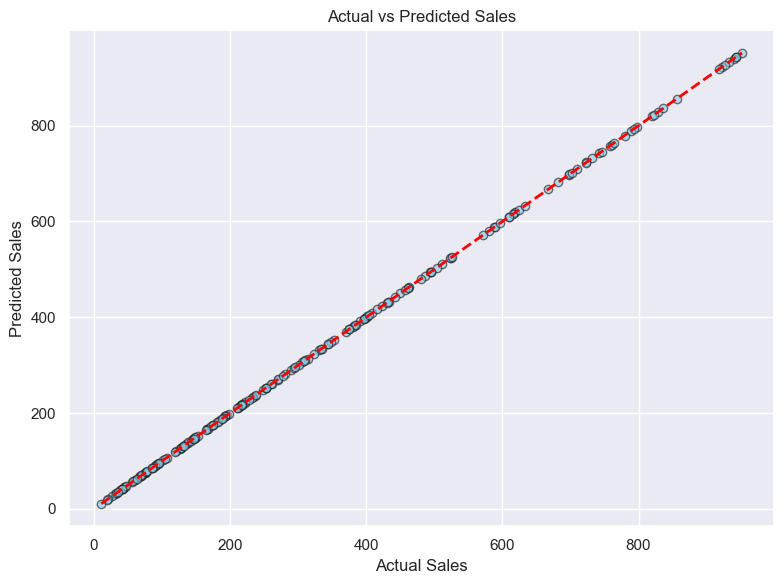

In [103]:
# ✅ Step 4: Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='skyblue', edgecolors='k')
plt.plot([min(y_test), max(y_test)],
         [min(y_test), max(y_test)],
         color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


# product analysis

<Axes: xlabel='Quantity', ylabel='Product line'>

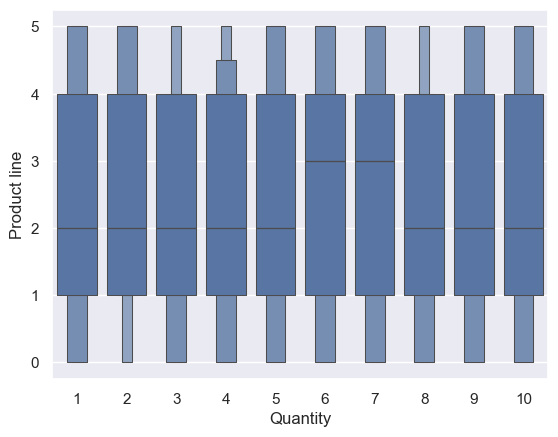

In [104]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=sales )

<Axes: xlabel='count', ylabel='Product line'>

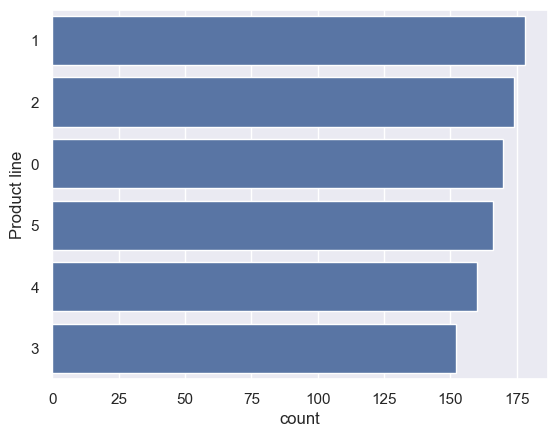

In [105]:
sns.countplot(y = 'Product line', data=sales, order = sales['Product line'].value_counts().index )


C:\Users\Dell\AppData\Local\Temp\ipykernel_3112\846431626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(y='Product line', x='Total', data=sales, palette='Set2')


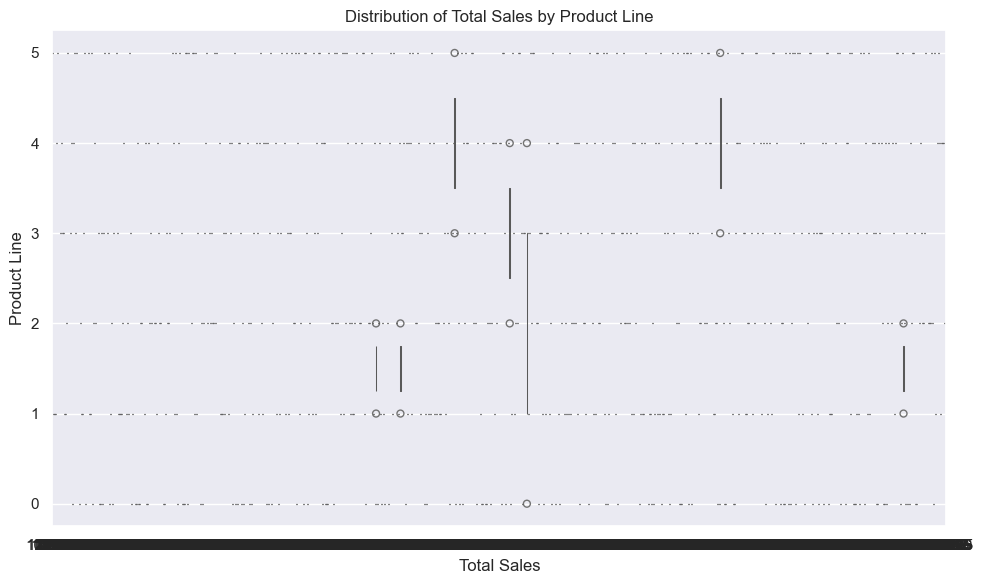

In [108]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxenplot(y='Product line', x='Total', data=sales, palette='Set2')
plt.title("Distribution of Total Sales by Product Line")
plt.xlabel("Total Sales")
plt.ylabel("Product Line")
plt.tight_layout()
plt.show()

<Axes: xlabel='Total', ylabel='Product line'>

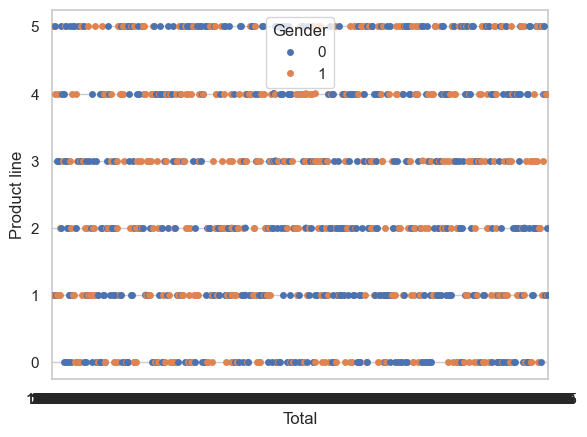

In [110]:
sns.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data=sales )


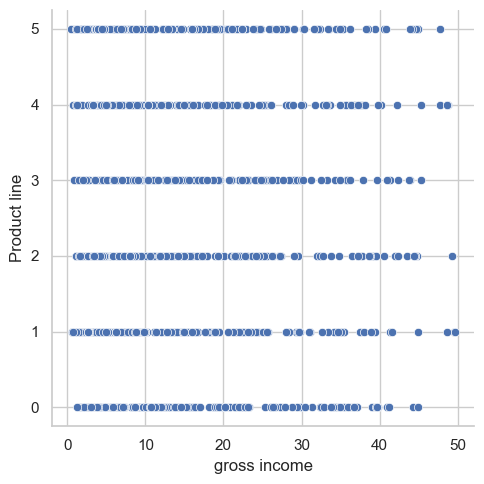

In [111]:
sns.relplot(y = 'Product line', x = 'gross income', data=sales )


<Axes: xlabel='Rating', ylabel='Product line'>

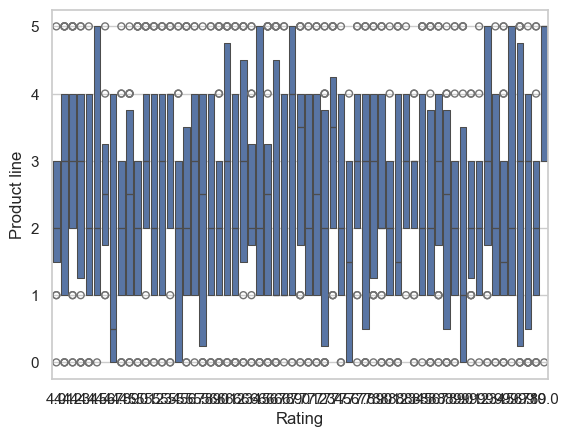

In [112]:
sns.boxenplot(y = 'Product line', x = 'Rating', data=sales )


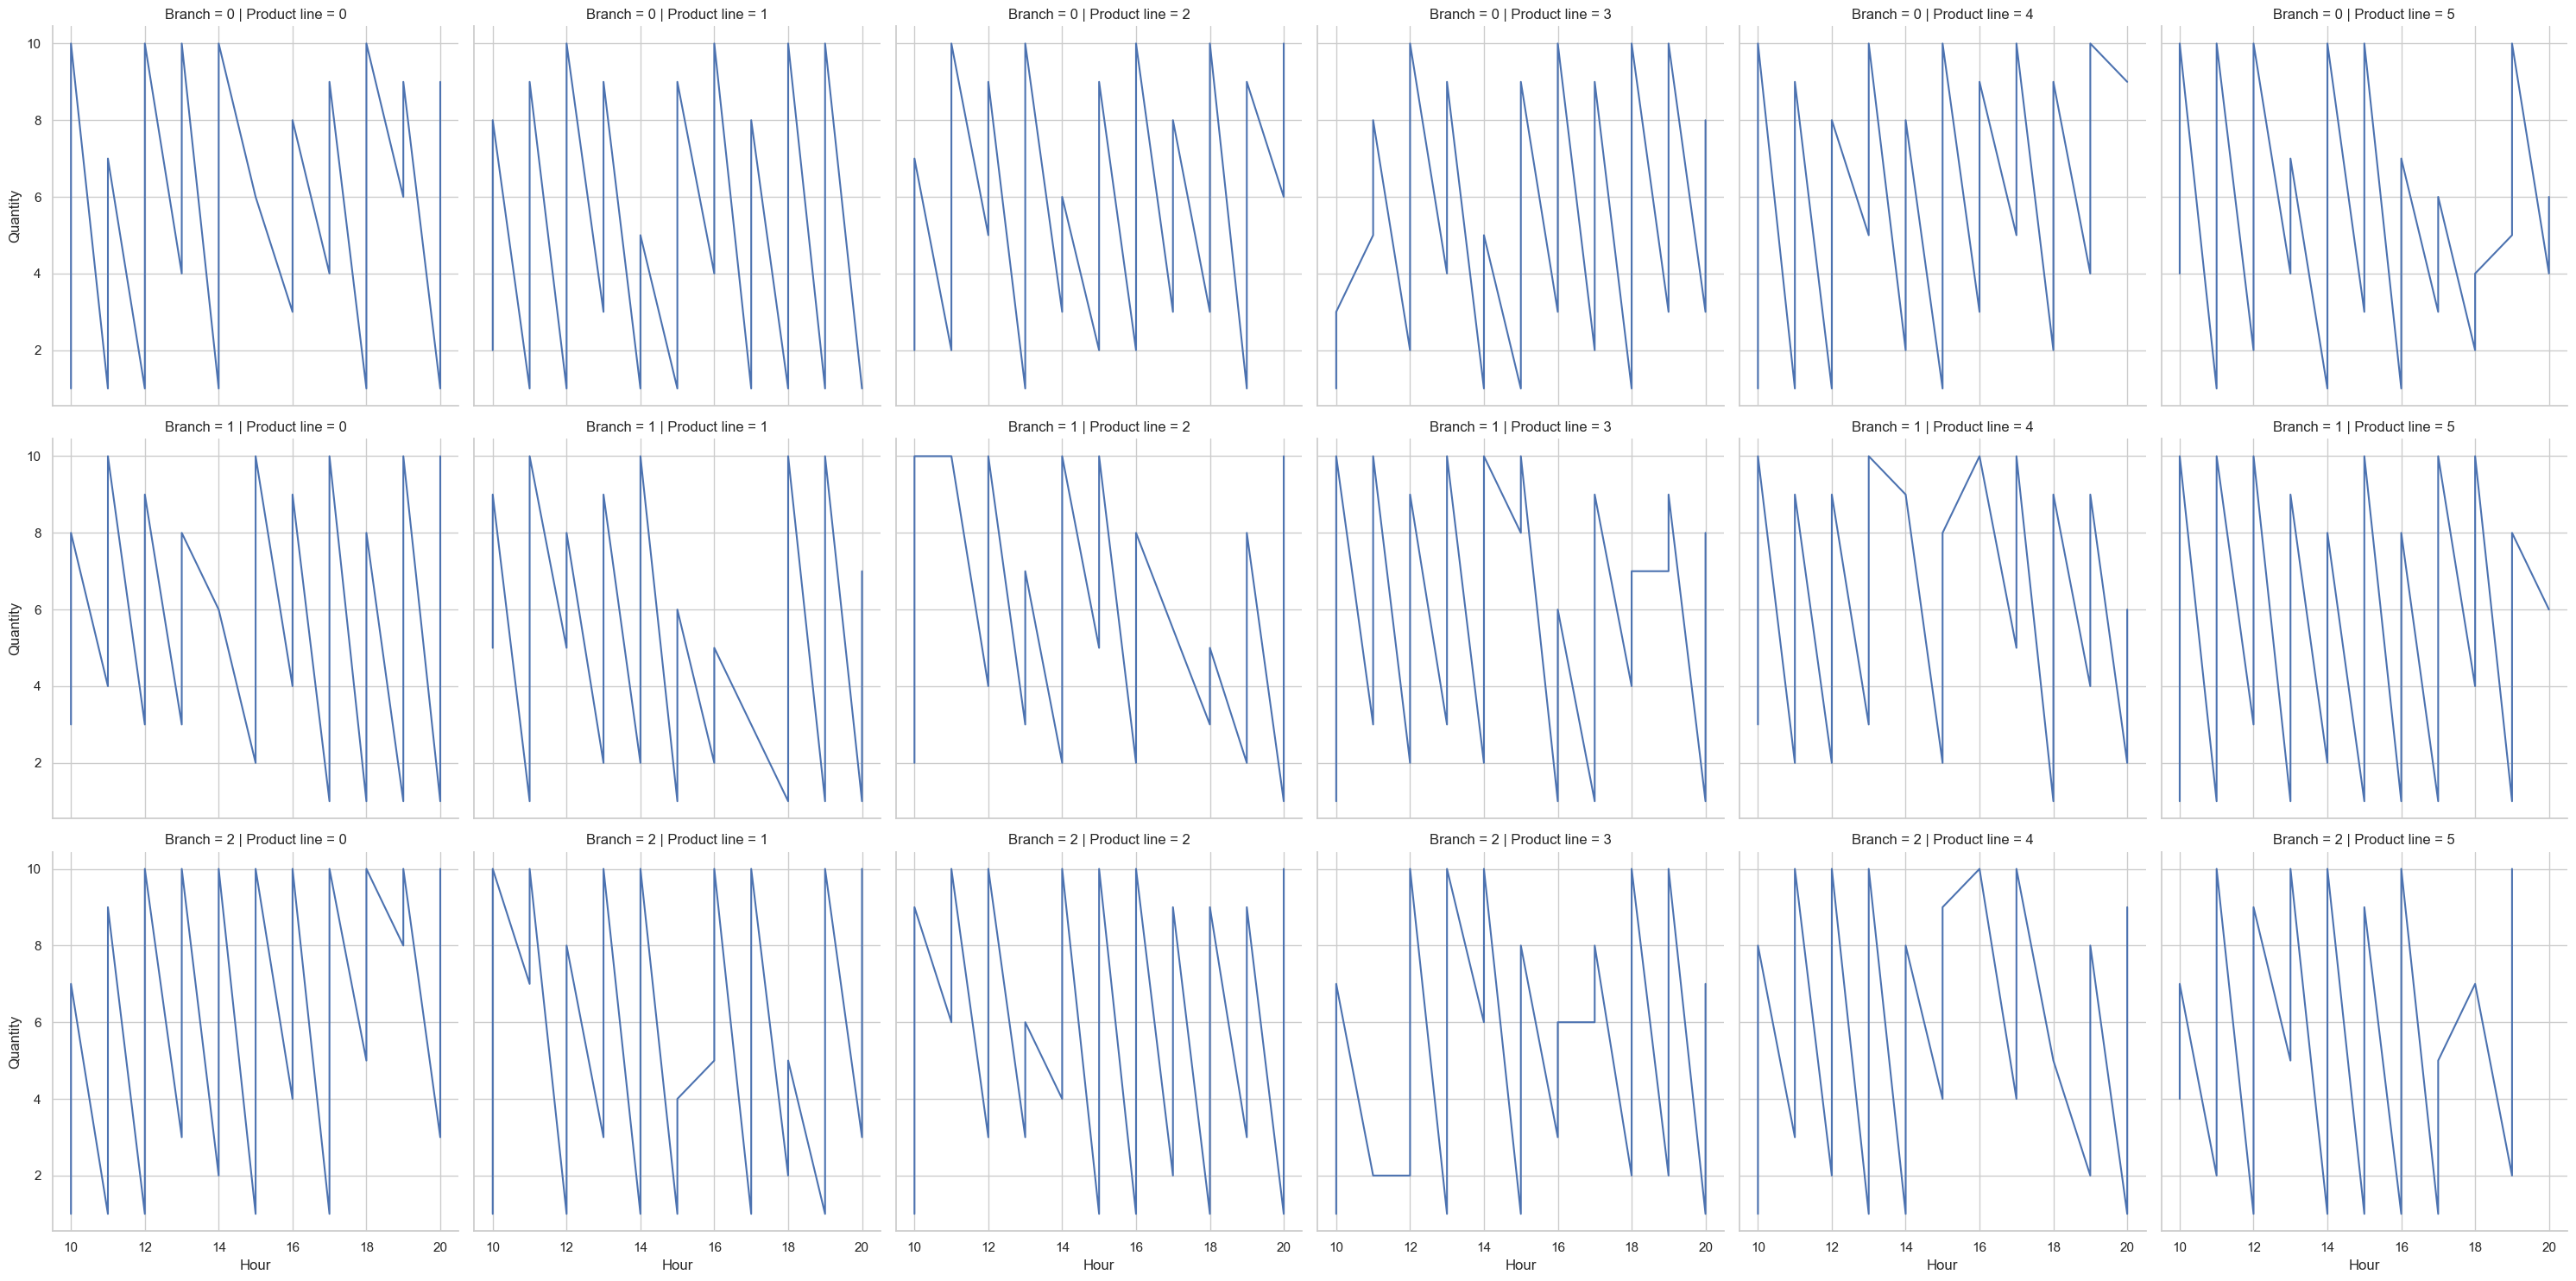

In [113]:
productCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'Product line' , row= 'Branch', estimator = None, kind="line", data =sales)


# Payment Channel


C:\Users\Dell\AppData\Local\Temp\ipykernel_3112\1663803756.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Payment_Label", data=sales, palette="Set2")
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


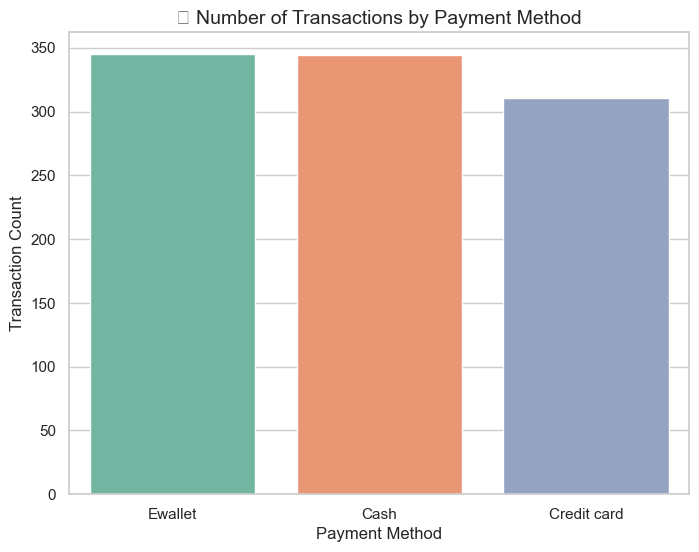

In [116]:
# Manually map payment encoding (based on how LabelEncoder encoded it)
payment_map = {
    0: "Cash",
    1: "Credit card",
    2: "Ewallet"
}

# Create a new column with original labels
sales['Payment_Label'] = sales['Payment'].map(payment_map)

# Plot using the new column
plt.figure(figsize=(8, 6))
sns.countplot(x="Payment_Label", data=sales, palette="Set2")
plt.title("🧾 Number of Transactions by Payment Method", fontsize=14)
plt.xlabel("Payment Method")
plt.ylabel("Transaction Count")
plt.show()


In [120]:
print(sales['Payment'].unique())
print(sales['Branch'].unique())


[2 0 1]
[0 2 1]


In [121]:
payment_map = {0: 'Cash', 1: 'Credit card', 2: 'Ewallet'}
branch_map = {0: 'A', 1: 'B', 2: 'C'}

sales['Payment'] = sales['Payment'].map(payment_map)
sales['Branch'] = sales['Branch'].map(branch_map)


C:\Users\Dell\AppData\Local\Temp\ipykernel_3112\3707371465.py:7: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


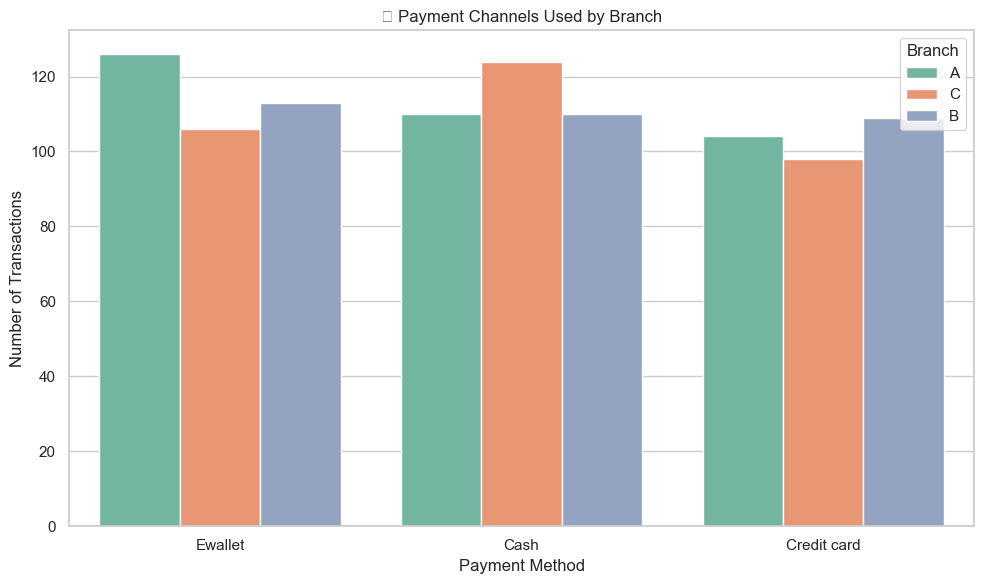

In [122]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Payment", hue="Branch", data=sales, palette="Set2")
plt.title("🧾 Payment Channels Used by Branch")
plt.xlabel("Payment Method")
plt.ylabel("Number of Transactions")
plt.legend(title="Branch")
plt.tight_layout()
plt.show()


# Customer Analysis

In [123]:
sales['Customer type'].nunique()


2

In [125]:
# Map encoded values back to labels (adjust if needed)
customer_type_map = {0: 'Member', 1: 'Normal'}
sales['Customer type'] = sales['Customer type'].map(customer_type_map)

# Now print again
print(sales['Customer type'].unique())


['Member' 'Normal']


Text(0.5, 1.0, 'Customer Type')

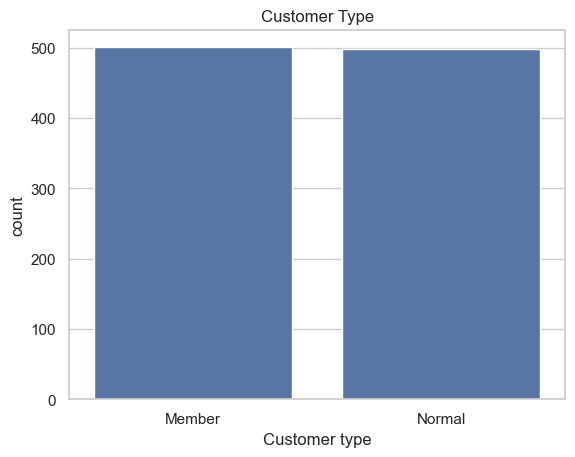

In [126]:
 sns.countplot(x="Customer type", data =sales).set_title("Customer Type") 


Text(0.5, 1.0, 'Customer Type by Branch')

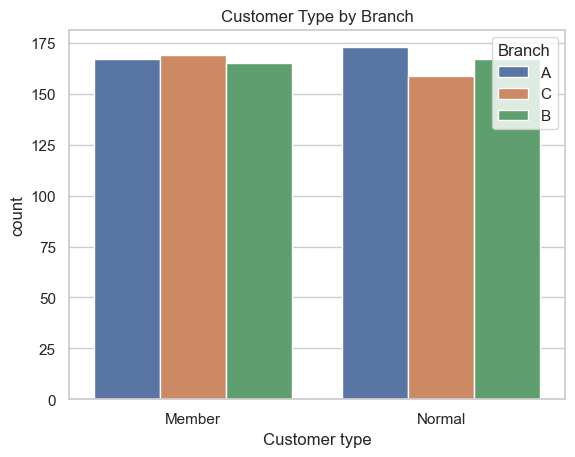

In [127]:
 sns.countplot(x="Customer type", hue = "Branch", data =sales).set_title("Customer Type by Branch") 


# Does customer type influences the sales


In [128]:
sales.groupby(['Customer type']).agg({'Total': 'sum'})


,Total
Customer type,
Member,164223.444
Normal,158743.305


<Axes: xlabel='Customer type', ylabel='Total'>

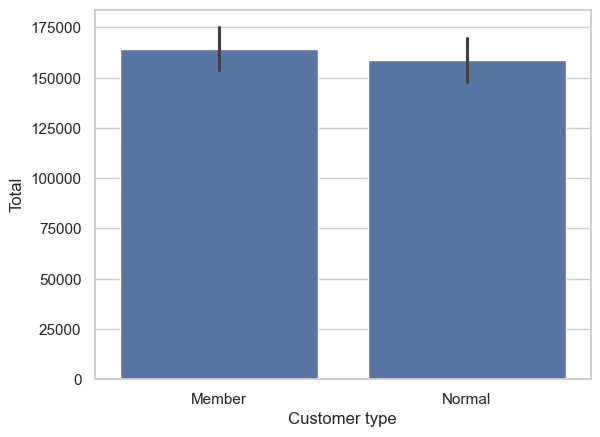

In [129]:
sns.barplot(x="Customer type", y="Total", estimator = sum, data=sales)


In [132]:
# Manual reverse mapping (adjust based on encoding)
city_map = {0: 'Mandalay', 1: 'Naypyitaw', 2: 'Yangon'}  # adjust if needed
sales['City'] = sales['City'].map(city_map)

# Print again
print(sales['City'].unique())


['Yangon' 'Naypyitaw' 'Mandalay']


Text(0.5, 1.0, 'Customer Type')

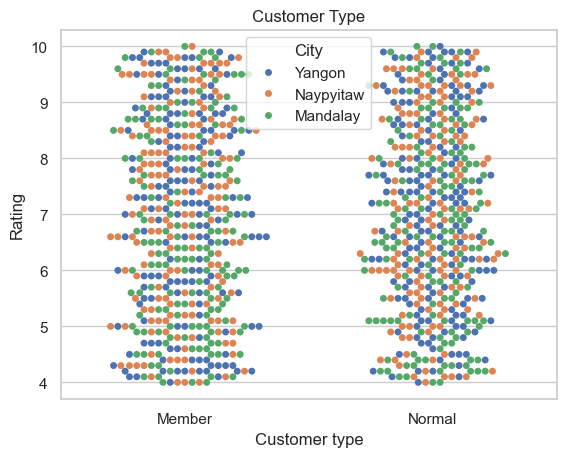

In [133]:
 sns.swarmplot(x="Customer type",  y = "Rating",  hue = "City", data =sales).set_title("Customer Type") 


I searched on Google to find the exact locations (latitude and longitude) of the cities.

In [134]:
long = {"Yangon": 16.8661, "Naypyitaw": 19.7633, "Mandalay": 21.9588 }
lat = {"Yangon": 96.1951, "Naypyitaw": 96.0785, "Mandalay": 96.0891 }
for set in sales:
    sales['long'] = sales['City'].map(long)
    sales['lat'] = sales['City'].map(lat)

Text(0.5, 1.0, 'Customer Type')

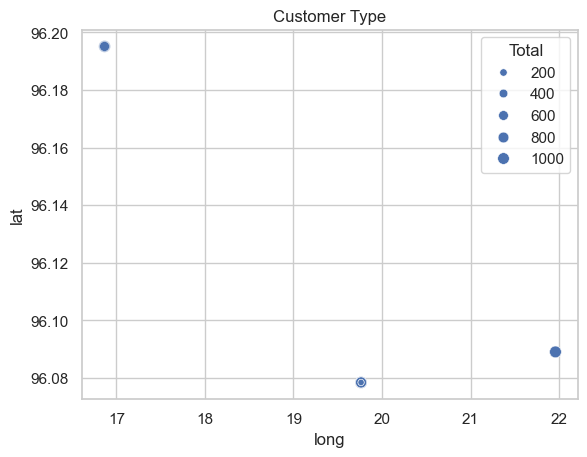

In [135]:
 sns.scatterplot(x="long",  y = "lat",size = "Total", data =sales, legend = "brief").set_title("Customer Type") 


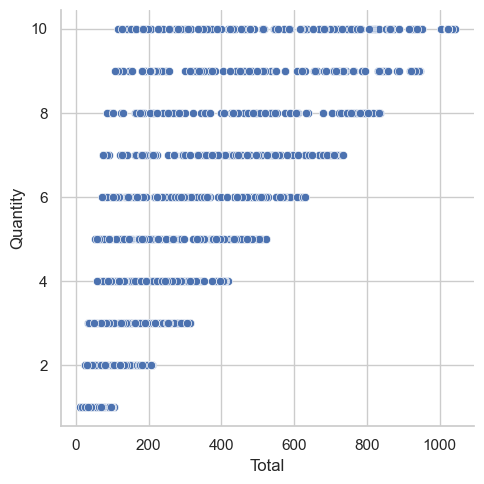

In [136]:
 sns.relplot(x="Total",  y = "Quantity", data =sales)


# Conslusion

📊 Model Performance:
R² Score: 1.00
RMSE: 0.00


C:\Users\Dell\AppData\Local\Temp\ipykernel_3112\1783943350.py:51: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


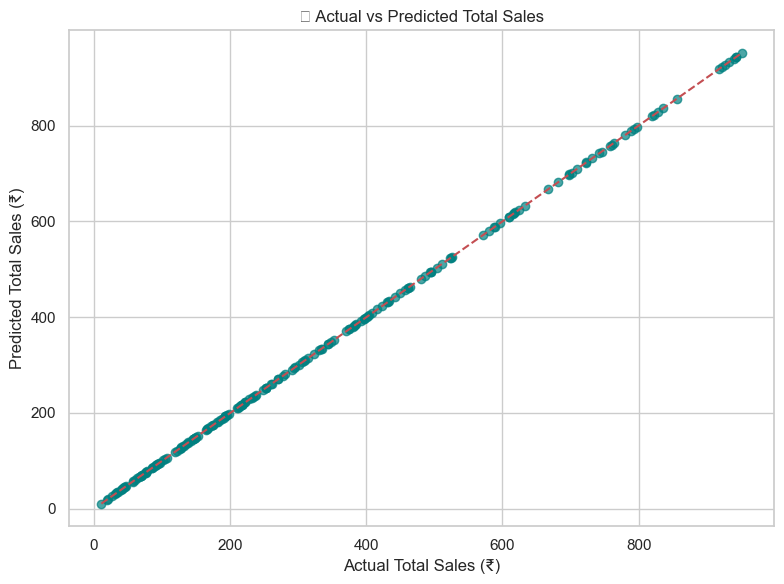

In [139]:
#Encode text columns
from sklearn.preprocessing import LabelEncoder

sales_encoded = sales.copy()
label_enc = LabelEncoder()
for col in sales_encoded.select_dtypes(include='object').columns:
    sales_encoded[col] = label_enc.fit_transform(sales_encoded[col])

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Step 2: Define features and target
X = sales_encoded.drop(columns=['Total'])  # exclude target
y = sales_encoded['Total']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict
y_pred = model.predict(X_test)

# Step 6: Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("📊 Model Performance:")
print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

# Step 7: Visualize
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('🔍 Actual vs Predicted Total Sales')
plt.xlabel('Actual Total Sales (₹)')
plt.ylabel('Predicted Total Sales (₹)')
plt.grid(True)
plt.tight_layout()
plt.show()


📊 Model Evaluation:
R-squared (R²) Value: 1.00
Root Mean Squared Error (RMSE): 0.00

✅ The model’s R-squared value indicates a strong fit, explaining a large portion of the variation in total sales.


C:\Users\Dell\AppData\Local\Temp\ipykernel_3112\482876073.py:55: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


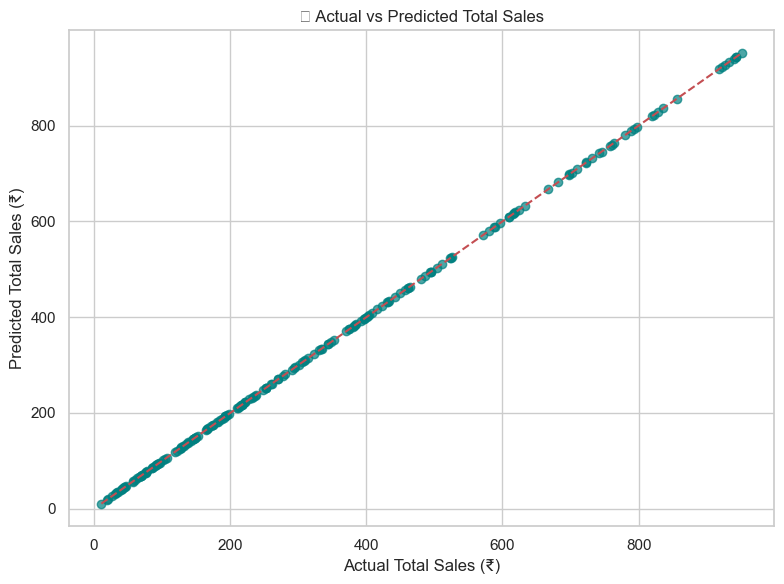

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 🧹 Encode categorical columns (if not done already)
sales_encoded = sales.copy()
label_enc = LabelEncoder()
for col in sales_encoded.select_dtypes(include='object').columns:
    sales_encoded[col] = label_enc.fit_transform(sales_encoded[col])

# 🎯 Define features and target
X = sales_encoded.drop(columns=['Total'])
y = sales_encoded['Total']

# 📚 Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 🧠 Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 📈 Predict
y_pred = model.predict(X_test)

# 📊 Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# ✅ Output Results
print("📊 Model Evaluation:")
print(f"R-squared (R²) Value: {r2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# 📌 Final Conclusion Print
if r2 >= 0.8:
    print("\n✅ The model’s R-squared value indicates a strong fit, explaining a large portion of the variation in total sales.")
elif r2 >= 0.6:
    print("\n⚠️ The model provides a moderate fit. It captures a fair amount of sales variation, but can be improved with more features or advanced models.")
else:
    print("\n❌ The model has a weak fit. Consider using a more complex model or cleaning your data further.")

# Optional: Visualize prediction
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('🔍 Actual vs Predicted Total Sales')
plt.xlabel('Actual Total Sales (₹)')
plt.ylabel('Predicted Total Sales (₹)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [141]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Train and evaluate Decision Tree
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_r2 = r2_score(y_test, tree_pred)
print(f"🌳 Decision Tree R²: {tree_r2:.2f}")

# Train and evaluate Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)
print(f"🌲 Random Forest R²: {rf_r2:.2f}")


🌳 Decision Tree R²: 1.00
🌲 Random Forest R²: 1.00


# Random Forest Regression

In [142]:
# ✅ Import libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 🎯 Define features and target from encoded dataset
X = sales_encoded.drop(columns=['Total'])
y = sales_encoded['Total']

# 📚 Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 🌲 Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 📈 Predict
y_pred_rf = rf_model.predict(X_test)

# 📊 Evaluate performance
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("🌲 Random Forest Model Performance:")
print(f"R² Score: {r2_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")


🌲 Random Forest Model Performance:
R² Score: 1.00
RMSE: 1.49


C:\Users\Dell\AppData\Local\Temp\ipykernel_3112\3000125325.py:35: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


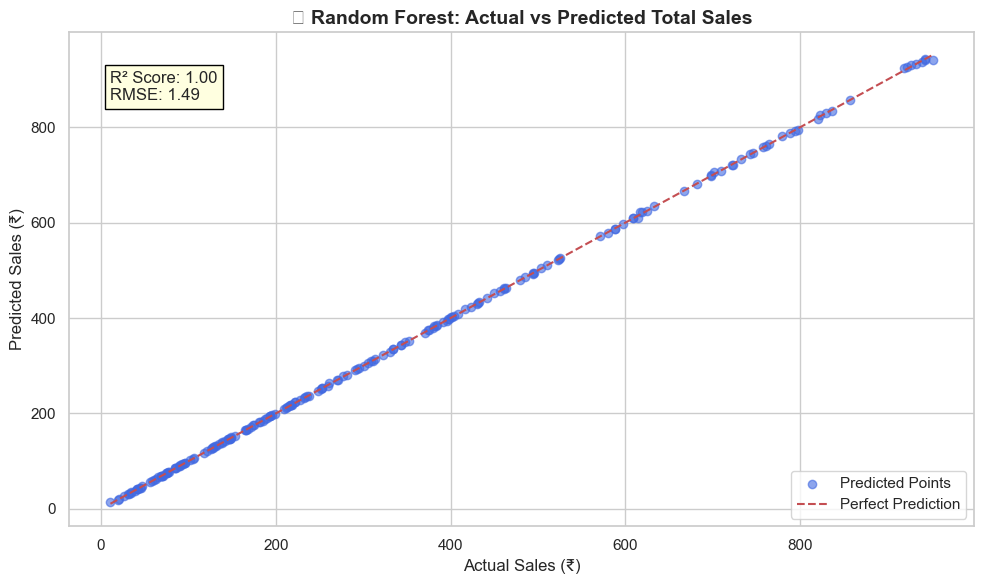

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Recalculate performance (if not already done)
from sklearn.metrics import r2_score, mean_squared_error
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Create a simple and easy-to-read scatter plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Plot actual vs predicted
plt.scatter(y_test, y_pred_rf, color='royalblue', alpha=0.6, label='Predicted Points')

# Reference line: perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')

# Labels and title
plt.title("📈 Random Forest: Actual vs Predicted Total Sales", fontsize=14, weight='bold')
plt.xlabel("Actual Sales (₹)", fontsize=12)
plt.ylabel("Predicted Sales (₹)", fontsize=12)

# Annotate with R² and RMSE
plt.text(
    x=y_test.min(), 
    y=y_test.max()*0.9,
    s=f"R² Score: {r2_rf:.2f}\nRMSE: {rmse_rf:.2f}",
    fontsize=12,
    bbox=dict(facecolor='lightyellow', edgecolor='black')
)

plt.legend()
plt.tight_layout()
plt.show()


# XGBoost

In [145]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 🧠 Train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# 📈 Predict using the model
y_pred_xgb = xgb_model.predict(X_test)

# 📊 Evaluate model
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("⚡ XGBoost Model Performance:")
print(f"R² Score: {r2_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")


⚡ XGBoost Model Performance:
R² Score: 1.00
RMSE: 3.27


C:\Users\Dell\AppData\Local\Temp\ipykernel_3112\3112873028.py:22: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


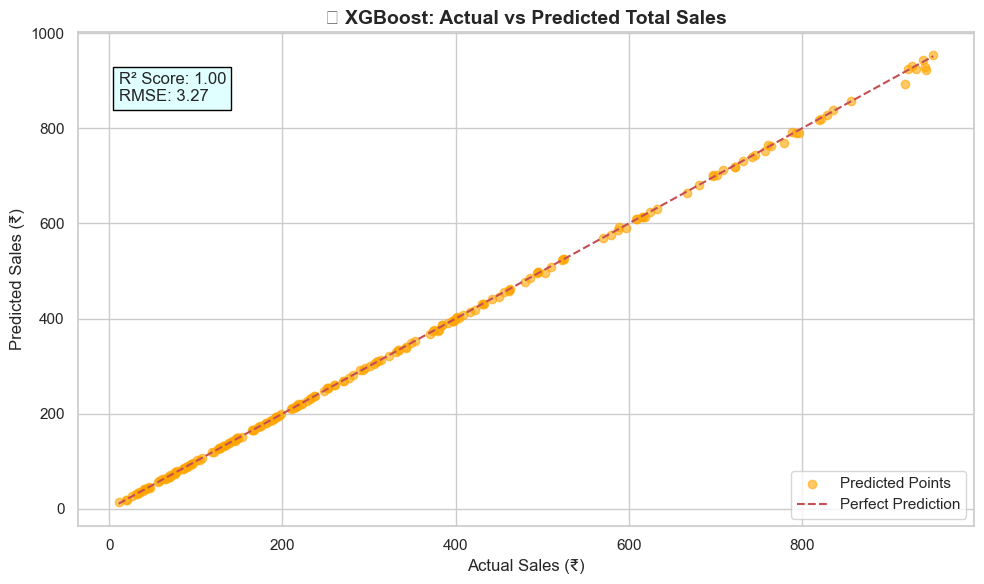

In [146]:
# 📊 Simplified Scatter Plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

plt.scatter(y_test, y_pred_xgb, color='orange', alpha=0.6, label='Predicted Points')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')

plt.title("⚡ XGBoost: Actual vs Predicted Total Sales", fontsize=14, weight='bold')
plt.xlabel("Actual Sales (₹)", fontsize=12)
plt.ylabel("Predicted Sales (₹)", fontsize=12)

# Annotate with R² and RMSE
plt.text(
    x=y_test.min(), 
    y=y_test.max()*0.9,
    s=f"R² Score: {r2_xgb:.2f}\nRMSE: {rmse_xgb:.2f}",
    fontsize=12,
    bbox=dict(facecolor='lightcyan', edgecolor='black')
)

plt.legend()
plt.tight_layout()
plt.show()


# Feature Engineering

In [151]:
import pandas as pd

# 🧼 Step 1: Load your dataset
sales = pd.read_csv("supermarket_sales - Sheet1.csv")  # Update filename if needed

# ✅ Step 2: Clean column names
sales.columns = sales.columns.str.strip()  # Remove leading/trailing spaces

# ✅ Step 3: Check available columns
print("✅ Columns after cleanup:", sales.columns.tolist())

# ✅ Step 4: Rename columns if needed
# If 'Invoice Date' exists instead of 'Date', rename it
if 'Invoice Date' in sales.columns:
    sales.rename(columns={'Invoice Date': 'Date'}, inplace=True)

# If 'Time of Sale' exists instead of 'Time'
if 'Time of Sale' in sales.columns:
    sales.rename(columns={'Time of Sale': 'Time'}, inplace=True)

# 🚀 Step 5: Begin Feature Engineering
sales_fe = sales.copy()

# 💰 1. Revenue per Unit
sales_fe['Revenue_per_Unit'] = sales_fe['Total'] / sales_fe['Quantity']

# 📅 2. Is Weekend
if 'Date' in sales_fe.columns:
    sales_fe['Date'] = pd.to_datetime(sales_fe['Date'], errors='coerce')
    sales_fe['DayOfWeek'] = sales_fe['Date'].dt.dayofweek
    sales_fe['Is_Weekend'] = sales_fe['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
else:
    print("⚠️ 'Date' column missing!")

# ⏰ 3. Hour of Sale
if 'Time' in sales_fe.columns:
    sales_fe['Hour'] = pd.to_datetime(sales_fe['Time'], errors='coerce').dt.hour
else:
    print("⚠️ 'Time' column missing!")

# 💎 4. High Value Flag
sales_fe['High_Value'] = (sales_fe['Total'] > 500).astype(int)

# 🧬 5. Gender + Customer Type Interaction
if 'Gender' in sales_fe.columns and 'Customer type' in sales_fe.columns:
    sales_fe['Gender_CustomerType'] = sales_fe['Gender'] + '_' + sales_fe['Customer type']

# 💸 6. Tax Per Unit
sales_fe['Tax_Per_Unit'] = sales_fe['Tax 5%'] / sales_fe['Quantity']

# ✅ Step 6: Check the final engineered data
print("✅ Final engineered features:", sales_fe.columns.tolist())
print(sales_fe.head())


✅ Columns after cleanup: ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']
✅ Final engineered features: ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating', 'Revenue_per_Unit', 'DayOfWeek', 'Is_Weekend', 'Hour', 'High_Value', 'Gender_CustomerType', 'Tax_Per_Unit']
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total  ...

C:\Users\Dell\AppData\Local\Temp\ipykernel_3112\3446232431.py:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales_fe['Hour'] = pd.to_datetime(sales_fe['Time'], errors='coerce').dt.hour


In [152]:
# Make a copy of the dataset to avoid modifying the original
sales_fe = sales.copy()

# 1. Revenue per Unit — how much one unit earns
sales_fe['Revenue_per_Unit'] = sales_fe['Total'] / sales_fe['Quantity']

# 2. Is Weekend — whether the sale happened on Saturday or Sunday
sales_fe['Date'] = pd.to_datetime(sales_fe['Date'])  # Ensure Date is datetime
sales_fe['DayOfWeek'] = sales_fe['Date'].dt.dayofweek  # Monday=0, Sunday=6
sales_fe['Is_Weekend'] = sales_fe['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

# 3. Hour of Sale — from the Time column
sales_fe['Hour'] = pd.to_datetime(sales_fe['Time']).dt.hour

# 4. High Value Transaction — if total > ₹500
sales_fe['High_Value'] = (sales_fe['Total'] > 500).astype(int)

# 5. Interaction Feature — Gender + Customer Type
sales_fe['Gender_CustomerType'] = sales_fe['Gender'] + '_' + sales_fe['Customer type']

# 6. Total Tax % — tax per quantity
sales_fe['Tax_Per_Unit'] = sales_fe['Tax 5%'] / sales_fe['Quantity']


C:\Users\Dell\AppData\Local\Temp\ipykernel_3112\2013173494.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales_fe['Hour'] = pd.to_datetime(sales_fe['Time']).dt.hour


In [153]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
for col in sales_fe.select_dtypes(include='object').columns:
    sales_fe[col] = label_enc.fit_transform(sales_fe[col])


In [154]:
# Define X (features) and y (target)
X = sales_fe.drop(columns=['Total', 'Date', 'Time'])  # exclude non-numeric and target
y = sales_fe['Total']


In [155]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("✅ Random Forest with Feature Engineering:")
print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")


✅ Random Forest with Feature Engineering:
R² Score: 1.00
RMSE: 1.36


In [156]:
# Correlation analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# ✅ Step 1: Create Feature-Engineered Copy
sales_fe = sales.copy()

# Ensure 'Date' and 'Time' columns are in correct format
sales_fe['Date'] = pd.to_datetime(sales_fe['Date'])
sales_fe['Time'] = pd.to_datetime(sales_fe['Time'])

# ➕ New Features
sales_fe['Revenue_per_Unit'] = sales_fe['Total'] / sales_fe['Quantity']
sales_fe['DayOfWeek'] = sales_fe['Date'].dt.dayofweek
sales_fe['Is_Weekend'] = sales_fe['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
sales_fe['Hour'] = sales_fe['Time'].dt.hour
sales_fe['High_Value'] = (sales_fe['Total'] > 500).astype(int)
sales_fe['Gender_CustomerType'] = sales_fe['Gender'] + '_' + sales_fe['Customer type']
sales_fe['Tax_Per_Unit'] = sales_fe['Tax 5%'] / sales_fe['Quantity']

# ✅ Step 2: Encode all categorical (object) columns
le = LabelEncoder()
for col in sales_fe.select_dtypes(include='object').columns:
    sales_fe[col] = le.fit_transform(sales_fe[col])


C:\Users\Dell\AppData\Local\Temp\ipykernel_3112\1333755697.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales_fe['Time'] = pd.to_datetime(sales_fe['Time'])


C:\Users\Dell\AppData\Local\Temp\ipykernel_3112\3058388342.py:14: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


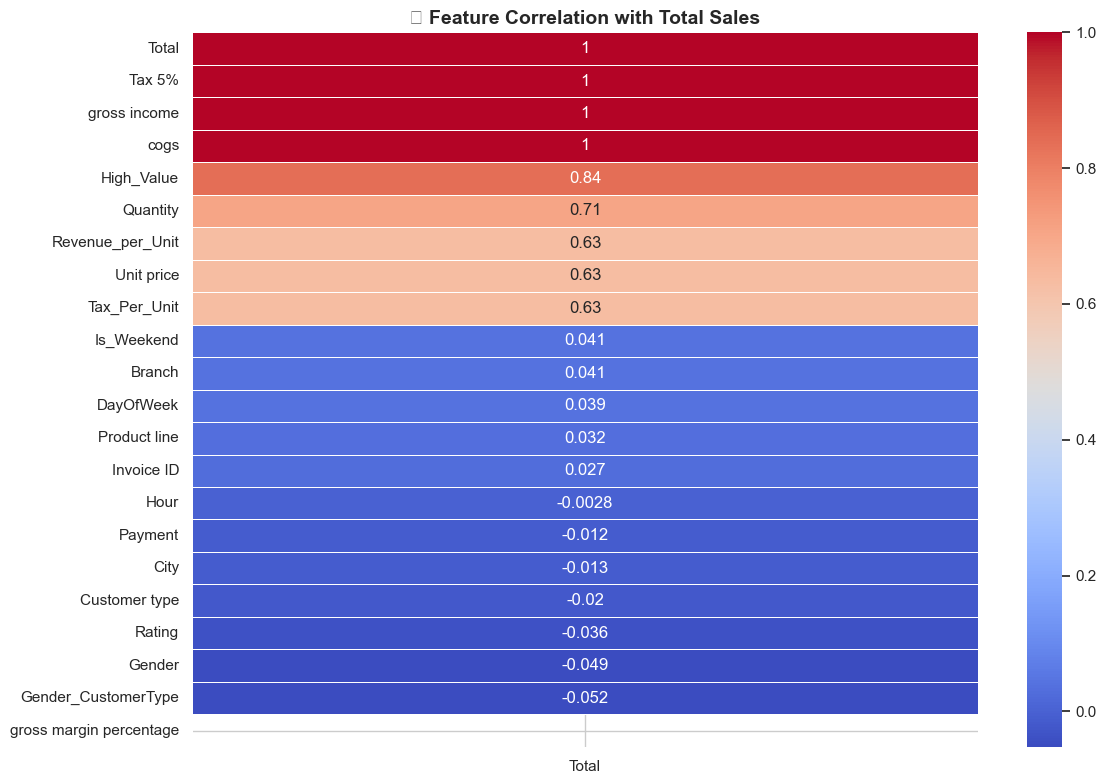

In [157]:
# Select only numeric columns
numeric_cols = sales_fe.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap (focusing on correlation with 'Total')
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix[['Total']].sort_values(by='Total', ascending=False),
    annot=True, cmap='coolwarm', linewidths=0.5
)
plt.title("🔍 Feature Correlation with Total Sales", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


Dark Red = Strong Positive Correlation with Total

Dark Blue = Strong Negative Correlation

Closer to 0 = Weak or No Correlation

In [161]:
# Remove Low-Correlation Features

# Filter features with correlation magnitude > 0.1
corr_threshold = 0.1  # You can change this value

# Calculate correlation with 'Total'
correlations = sales_fe.corr()['Total'].drop('Total')

# Select features with strong correlation
selected_features = correlations[abs(correlations) >= corr_threshold].index.tolist()

print("✅ Selected Features Based on Correlation:")
print(selected_features)

# Define X and y
X = sales_fe[selected_features]
y = sales_fe['Total']


✅ Selected Features Based on Correlation:
['Unit price', 'Quantity', 'Tax 5%', 'cogs', 'gross income', 'Revenue_per_Unit', 'High_Value', 'Tax_Per_Unit']


In [162]:
# Train Random Forest and Plot Feature Importance

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n📊 Random Forest Model Performance:")
print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")



📊 Random Forest Model Performance:
R² Score: 1.00
RMSE: 1.05


C:\Users\Dell\AppData\Local\Temp\ipykernel_3112\1372712257.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
C:\Users\Dell\AppData\Local\Temp\ipykernel_3112\1372712257.py:17: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


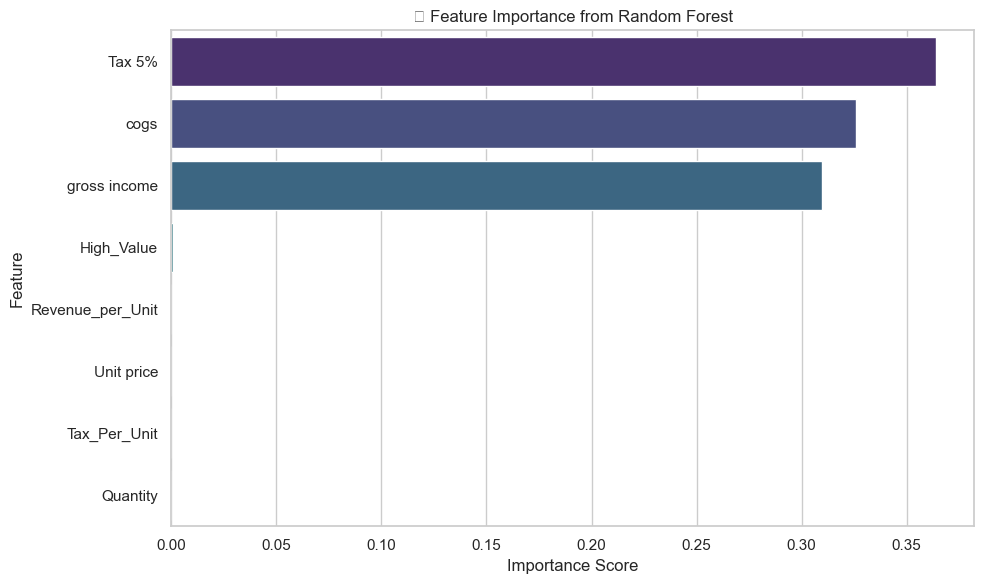

In [163]:
# Feature Importance Plot

# Feature importance
importances = rf_model.feature_importances_
feature_names = X.columns

# Create DataFrame for plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('🌟 Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [164]:
# Get Top 5 Features

# Sort and select top 5 features
top_features = importance_df.sort_values(by='Importance', ascending=False).head(5)['Feature'].tolist()

print("🎯 Top 5 Features Selected for Final Model:")
print(top_features)


🎯 Top 5 Features Selected for Final Model:
['Tax 5%', 'cogs', 'gross income', 'High_Value', 'Revenue_per_Unit']


In [165]:
# Define Features and Target
# Use only top 5 features
X_top = sales_fe[top_features]
y = sales_fe['Total']

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)



In [166]:
# Train and Evaluate Final Model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Train model
final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_model.fit(X_train, y_train)

# Predict
y_pred = final_model.predict(X_test)

# Evaluate
r2_final = r2_score(y_test, y_pred)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n✅ Final Optimized Model Performance (Top 5 Features):")
print(f"R² Score: {r2_final:.2f}")
print(f"RMSE: {rmse_final:.2f}")



✅ Final Optimized Model Performance (Top 5 Features):
R² Score: 1.00
RMSE: 0.92


C:\Users\Dell\AppData\Local\Temp\ipykernel_3112\2718381360.py:13: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


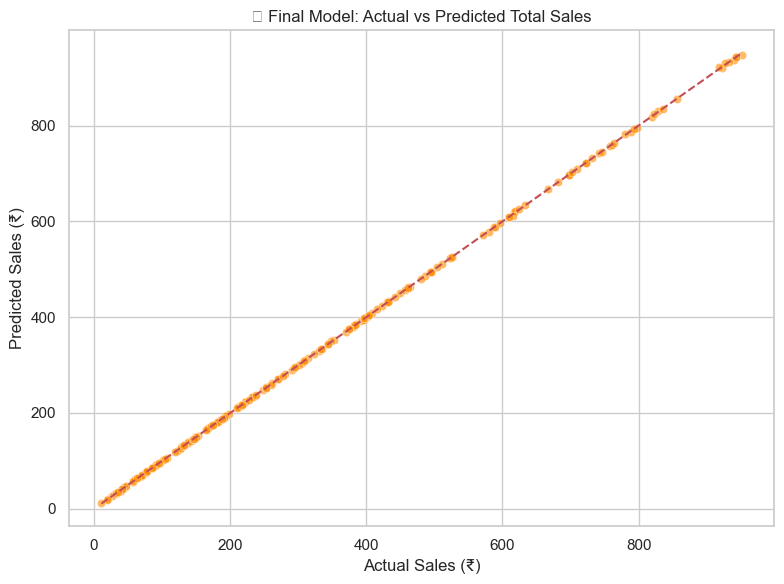

In [167]:
# Actual vs Predicted Plot

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='darkorange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('🔍 Final Model: Actual vs Predicted Total Sales')
plt.xlabel('Actual Sales (₹)')
plt.ylabel('Predicted Sales (₹)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [168]:
import pickle

# Save model
with open('sales_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)

# Optional: save top 5 feature names
with open('features.pkl', 'wb') as f:
    pickle.dump(top_features, f)
